# Homework 3: Applying Functions, Iteration, Probability, Simulation, Estimation, and Assessing Models

**Helpful Resource:**
- [Python Reference](http://data8.org/fa20/python-reference.html)

**Reading**: 
* [Table Guide](https://piazza.com/class/kdl5cn50fh652e?cid=881)
* [Applying Functions](https://www.inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html)
* [Conditionals](https://www.inferentialthinking.com/chapters/09/1/Conditional_Statements.html)
* [Iteration](https://www.inferentialthinking.com/chapters/09/2/Iteration.html)
* [Randomness](https://www.inferentialthinking.com/chapters/09/Randomness.html)
* [Sampling and Empirical Distributions](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

Deadline:

This assignment is due on February 3 (Friday), 2023 at 23:59

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. 

In [173]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. 2019 Cal Football Season


Shoumik is trying to analyze how well the Cal football team performed in the 2019 season. A football game is divided into four periods, called quarters. The number of points Cal scored in each quarter, and the number of points their opponent scored in each quarter are stored in a table called `cal_fb.csv`.

In [174]:
# Just run this cell
# Read in the cal_fb csv file
games = Table().read_table("cal_fb.csv")
games.show()

Opponent,Cal 1Q,Cal 2Q,Cal 3Q,Cal 4Q,Opp 1Q,Opp 2Q,Opp 3Q,Opp 4Q
UC Davis,0,13,7,7,10,0,3,0
Washington,0,3,14,3,0,10,3,6
North Texas,20,0,3,0,0,3,7,7
Ole Miss,7,7,14,0,7,6,0,7
Arizona State,7,0,7,3,7,0,7,10
Oregon,7,0,0,0,0,0,10,7
Oregon State,0,3,14,0,7,7,0,7
Utah,0,0,0,0,7,21,7,0
Washington State,6,7,7,13,5,6,3,6
USC,7,3,0,7,10,7,17,7


Let's start by finding the total points each team scored in a game.

**Question 1.** Write a function called `sum_scores`.  It should take four arguments, where each argument is the team's score for that quarter. It should return the team's total score for that game.

*Tip: Don't overthink this question!*


<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [175]:
def sum_scores(q1, q2, q3, q4):
    '''Returns the total score calculated by adding up the score of each quarter'''
    return q1 + q2 + q3 + q4

sum_scores(14, 7, 3, 0) #DO NOT CHANGE THIS LINE

24

**Question 2.** Create a new table `final_scores` with three columns in this *specific* order: `Opponent`, `Cal Score`, `Opponent Score`. You will have to create the `Cal Score` and `Opponent Score` columns. Use the function `sum_scores` you just defined in the previous question for this problem.

*Hint:* If you want to apply a function that takes in multiple arguments, you can pass multiple column names as arguments in `tbl.apply()`. The column values will be passed into the corresponding arguments of the function. Take a look at the python reference for syntax.

*Tip:* If you’re running into issues creating final_scores, check that `cal_scores` and `opponent_scores` output what you want. 


<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [176]:
cal_scores = sum_scores(games.column(1), games.column(2), games.column(3), games.column(4))
opponent_scores = sum_scores(games.column(5), games.column(6), games.column(7), games.column(8))
final_scores = Table().with_columns("Opponent", games.column(0), "Cal Score", cal_scores, "Opponent Score", opponent_scores)
final_scores

Opponent,Cal Score,Opponent Score
UC Davis,27,13
Washington,20,19
North Texas,23,17
Ole Miss,28,20
Arizona State,17,24
Oregon,7,17
Oregon State,17,21
Utah,0,35
Washington State,33,20
USC,17,41


We can get specific row objects from a table. You can use `tbl.row(n)` to get the `n`th row of a table. `row.item("column_name")` will allow you to select the element that corresponds to `column_name` in a particular row. Here's an example:

In [177]:
# Just run this cell
games.row(10)

Row(Opponent='Stanford', Cal 1Q=7, Cal 2Q=3, Cal 3Q=0, Cal 4Q=14, Opp 1Q=7, Opp 2Q=3, Opp 3Q=7, Opp 4Q=3)

In [178]:
# Just run this cell
games.row(10).item("Cal 4Q")

14

**Question 3.** We want to see for a particular game whether or not Cal lost. Write a function called `did_cal_lose`.  It should take one argument: a row object from the `final_scores` table. It should return either `True` if Cal's score was less than the Opponent's score, and `False` otherwise.


<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [179]:
def did_cal_lose(input_row):
    '''Returns True if Cal lost the game described by the input_row and False otherwise'''
    return input_row.item("Cal Score") < input_row.item("Opponent Score")

**Question 4.** Shoumik wants to see how Cal did against every opponent during the 2019 season. Using the `final_scores` table:
1. Assign `results` to an array of `True` and `False` values that correspond to whether or not Cal lost
2. Add the `results` array to the `final_scores` table, and assign this to `final_scores_with_results`
3. Then, respectively assign the number of wins and losses Cal had to `cal_wins` and `cal_losses`.

Note: True and False are not strings ' '.

*Hint 1*: `tbl.num_rows` might be helpful too.


*Hint 2*: When you only pass a function name and no column labels through `tbl.apply()`, the function gets applied to every row in `tbl`


<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [180]:
results = final_scores.apply(did_cal_lose)
final_scores_with_results = final_scores.with_column("Cal Lost?", results)
cal_losses = sum(results)
cal_wins = len(results) - cal_losses

# Don't delete or edit the following line:
print(f"In the 2019 Season, Cal Football won {cal_wins} games and lost {cal_losses} games.")

In the 2019 Season, Cal Football won 8 games and lost 5 games.


## 2. Probability


We will be testing some probability concepts that were introduced in lecture. For all of the following problems, we will introduce a problem statement and give you a proposed answer. You must assign the provided variable to one of the following three integers, depending on whether the proposed answer is too low, too high, or correct. 

1. Assign the variable to 1 if you believe our proposed answer is correct.
2. Assign the variable to 2 if you believe our proposed answer is too high.
3. Assign the variable to 3 if you believe our proposed answer is too low. 

You are more than welcome to create more cells across this notebook to use for arithmetic operations 

**Question 1.** You roll a 6-sided die 10 times. What is the chance of getting 10 sixes?

Our proposed answer: $$\left(\frac{1}{6}\right)^{10}$$

Assign `ten_sixes` to either 1, 2, or 3 depending on if you think our answer is too high, too low, or correct. 

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [181]:
ten_sixes = 1
ten_sixes

1

**Question 2.** Take the same problem set-up as before, rolling a fair dice 10 times. What is the chance that every roll is less than or equal to 5?

Our proposed answer: $$1 - \left(\frac{1}{6}\right)^{10}$$

Assign `five_or_less` to either 1, 2, or 3. 

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [182]:
five_or_less = 2
five_or_less

2

**Question 3.** Assume we pick a lottery ticket by writing three distinct numbers from 1 to 1000 on a ticket. Next, the lottery person draws three numbers one by one from a bowl with numbers from 1 to 1000 each time without putting the previous number back in. We win if the 3 numbers from our lottery ticket match the 3 numbers drawn from the bowl (must be in same order).

If we decide to play the game and pick our numbers as 12, 140, and 890, what is the chance that we win? 

Our proposed answer: $$\left(\frac{1}{1000}\right)^3$$

Assign `lottery` to either 1, 2, or 3. 

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [183]:
lottery = ...
lottery

Ellipsis

**Question 4.** Assume we have two lists, list A and list B. List A contains the numbers [20,10,20], while list B contains the numbers [40,10,30,20,40,30]. We choose one number from list A randomly and one number from list B randomly. What is the chance that the number we drew from list A is larger than or equal to the number we drew from list B?

Our proposed solution: $$1/3$$

Assign `list_chances` to either 1, 2, or 3. 

*Hint: Consider the different possible ways that the items in List A can be greater than or equal to items in List B. Try working out your thoughts with a pencil and paper, what do you think the correct solutions will be close to?*

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [184]:
list_chances = ...
list_chances

Ellipsis

## 3. Monkeys Typing Shakespeare

A monkey is banging repeatedly on the keys of a special typewriter. Each time, the monkey is equally likely to hit any of the 26 lowercase letters of the English alphabet, 26 uppercase letters of the English alphabet, any number between 0-9 (inclusive), and 1 space key, regardless of what it has hit before. There are no other keys on the keyboard.  

This question is inspired by a mathematical theorem called the Infinite monkey theorem (<https://en.wikipedia.org/wiki/Infinite_monkey_theorem>), which postulates that if you put a monkey in the situation described above for an infinite time, they will eventually type out all of Shakespeare’s works.

**Question 1.** Suppose the monkey hits the keyboard 12 times.  Compute the chance that the monkey types the sequence `Data Science`.  (Call this `data_chance`.) Use algebra and type in an arithmetic equation that Python can evalute.

<!--
BEGIN QUESTION
name: q2_1
manual: false
-->

In [185]:
data_chance = ...
data_chance

Ellipsis

**Question 2.** Write a function called `simulate_key_strike`.  It should take **no arguments**, and it should return a random one-character string that is equally likely to be any of the 26 lower-case English letters, 26 upper-case English letters, any number between 0-9 (inclusive), or the space key. 

<!--
BEGIN QUESTION
name: q2_2
manual: false
-->

In [186]:
# We have provided the code below to compute a list called keys,
# containing all the lower-case English letters, upper-case English letters, the digits 0-9 (inclusive), and the 
# 1 space key.  Print it if you want to verify what it contains.
import string
keys = list(string.ascii_lowercase + string.ascii_uppercase + string.digits + " ")

def simulate_key_strike():
    """Simulates one random key strike."""
    return np.random.choice(keys)

# An example call to your function:
simulate_key_strike()

'Q'

**Question 3.** Write a function called `simulate_several_key_strikes`.  It should take one argument: an integer specifying the number of key strikes to simulate. It should return a string containing that many characters, each one obtained from simulating a key strike by the monkey.

*Hint 1:* If you make a list or array of the simulated key strikes called `key_strikes_array`, you can convert that to a single string by calling `"".join(key_strikes_array)`

*Hint 2:* Think about how we can store our results for the different key strikes and how iteration is useful. 

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [187]:
def simulate_several_key_strikes(num_strikes):
    accumulator = make_array()
    for i in np.arange(num_strikes):
        accumulator = np.append(accumulator, simulate_key_strike())
    return "".join(accumulator)

# An example call to your function:
simulate_several_key_strikes(11)

'eCkTZCzsSzm'

**Question 4.** Call `simulate_several_key_strikes` 5000 times, each time simulating the monkey striking 12 keys.  Compute the proportion of times the monkey types `"Data Science"`, calling that proportion `data_proportion`.

<!--
BEGIN QUESTION
name: q2_4
manual: false
-->

In [188]:
data_proportion = 0
for i in np.arange(5000):
    if (simulate_several_key_strikes(1)=='Data Science'):
        data_proportion += 1/5000
data_proportion

0

**Question 5.** Check the value your simulation computed for `data_proportion`.  Is simulation the best way to give us  the probability that the monkey types `"Data Science"` in 12 strikes (the answer to question 1)?  Why or why not?

*Hint:* Look back at what you got for `data_chance`.

<!--
BEGIN QUESTION
name: q2_5
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

**Question 6.** Compute the chance that the monkey types the letter `"t"` or `"T"` at least once in the 12 strikes.  Call it `t_or_T_chance`. Use algebra and type in an arithmetic equation that Python can evalute. 

<!--
BEGIN QUESTION
name: q2_6
manual: false
-->

In [189]:
t_or_T_chance = 1 - ((len(keys)-2)/len(keys))**12
t_or_T_chance

0.32099741653263714

**Question 7.** Do you think that a computer simulation is more or less effective to estimate `t_or_T_chance` compared to when we tried to estimate `data_chance` this way? Why or why not? (You don't need to write a simulation, but it is an interesting exercise.)

*Hint:* Compare `t_or_T_chance` to `data_chance`.

<!--
BEGIN QUESTION
name: q2_7
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

## 3. Sampling Basketball Players


This exercise uses salary data and game statistics for basketball players from the 2019-2020 NBA season. The data was collected from [Basketball-Reference](http://www.basketball-reference.com).

Run the next cell to load the two datasets.

In [190]:
player_data = Table.read_table('player_data.csv')
salary_data = Table.read_table('salary_data.csv')
player_data.show(3)
salary_data.show(3)

Player,3P,2P,PTS
Steven Adams,0,4.4,10.7
Bam Adebayo,0,6.2,15.8
LaMarcus Aldridge,1.2,6.3,19.1


Name,Salary
Stephen Curry,40231758
Chris Paul,38506482
Russell Westbrook,38178000


**Question 1.** We would like to relate players' game statistics to their salaries.  Compute a table called `full_data` that includes one row for each player who is listed in both `player_data` and `salary_data`.  It should include all the columns from `player_data` and `salary_data`, except the `"Name"` column.

<!--
BEGIN QUESTION
name: q3_1
manual: false
-->

In [191]:
full_data = player_data.join('Player', salary_data, 'Name')
full_data

Player,3P,2P,PTS,Salary
Aaron Gordon,1.2,4.1,14.2,19863636
Aaron Holiday,1.5,2.2,9.9,2239200
Abdel Nader,0.7,1.3,5.7,1618520
Admiral Schofield,0.5,0.6,3.2,898310
Al Horford,1.4,3.4,12,28000000
Al-Farouq Aminu,0.5,0.9,4.3,9258000
Alec Burks,1.7,3.3,15.8,2320044
Alen Smailagić,0.3,1.3,4.7,898310
Alex Caruso,0.7,1.2,5.5,2750000
Alex Len,0.4,3.2,8.7,4160000


Basketball team managers would like to hire players who perform well but don't command high salaries.  From this perspective, a very crude measure of a player's *value* to their team is the number of points for 3 pointers and free throws the player scored in a season for every **\$100000 of salary** (*Note*: the `Salary` column is in dollars, not hundreds of thousands of dollars). For example, Al Horford scored an average of 5.2 points for 3 pointers and free throws combined, and has a salary of **\$28 million.** This is equivalent to 280 thousands of dollars, so his value is $\frac{5.2}{280}$. The formula is:

$$\frac{\text{"PTS"} - 2 * \text{"2P"}}{\text{"Salary"}\ / \ 100000}$$

**Question 2.** Create a table called `full_data_with_value` that's a copy of `full_data`, with an extra column called `"Value"` containing each player's value (according to our crude measure).  Then make a histogram of players' values. 

*Just so you know:* Informative histograms contain a majority of the data and **exclude outliers**

<!--
BEGIN QUESTION
name: q3_2
manual: true
-->
<!-- EXPORT TO PDF -->

Player            | 3P   | 2P   | PTS  | Salary   | Value
Aaron Gordon      | 1.2  | 4.1  | 14.2 | 19863636 | 0.030206
Aaron Holiday     | 1.5  | 2.2  | 9.9  | 2239200  | 0.245623
Abdel Nader       | 0.7  | 1.3  | 5.7  | 1618520  | 0.191533
Admiral Schofield | 0.5  | 0.6  | 3.2  | 898310   | 0.22264
Al Horford        | 1.4  | 3.4  | 12   | 28000000 | 0.0185714
Al-Farouq Aminu   | 0.5  | 0.9  | 4.3  | 9258000  | 0.0270037
Alec Burks        | 1.7  | 3.3  | 15.8 | 2320044  | 0.396544
Alen Smailagić    | 0.3  | 1.3  | 4.7  | 898310   | 0.233772
Alex Caruso       | 0.7  | 1.2  | 5.5  | 2750000  | 0.112727
Alex Len          | 0.4  | 3.2  | 8.7  | 4160000  | 0.0552885
... (447 rows omitted)


(array([ 5.99552573,  2.32662192,  0.96196868,  0.31319911,  0.20134228,
         0.20134228]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 <BarContainer object of 6 artists>)

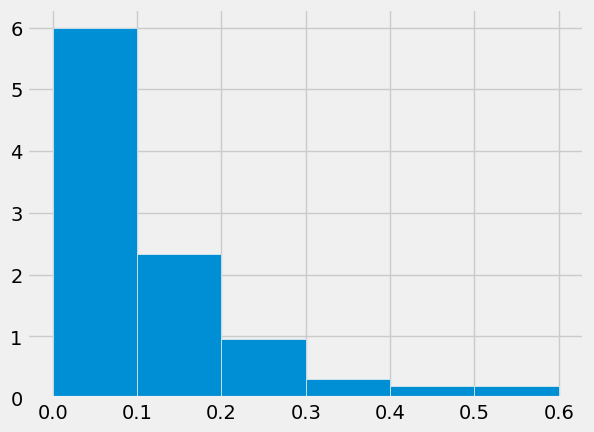

In [192]:
bins = np.arange(0, 0.7, .1) # Use this provided bins when you make your histogram
value = (full_data.column('PTS') - 2 * full_data.column('2P')) / (full_data.column('Salary') / 100000)
full_data_with_value = full_data.with_column('Value', value)
print(full_data_with_value)
plt.hist(full_data_with_value.column('Value'), bins = bins, density=True)

Now suppose we weren't able to find out every player's salary (perhaps it was too costly to interview each player).  Instead, we have gathered a *simple random sample* of 50 players' salaries.  The cell below loads those data.

In [193]:
sample_salary_data = Table.read_table("sample_salary_data.csv")
sample_salary_data.show(3)

Name,Salary
D.J. Wilson,2961120
Tyler Cook,101504
Abdel Nader,1618520


**Question 3.** Make a histogram of the values of the players in `sample_salary_data`, using the same method for measuring value we used in question 2. **Use the same bins, too.**  

*Hint:* This will take several steps.

<!--
BEGIN QUESTION
name: q3_3
manual: true
-->
<!-- EXPORT TO PDF -->

(array([ 5.71428571,  2.44897959,  0.81632653,  0.40816327,  0.20408163,
         0.40816327]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 <BarContainer object of 6 artists>)

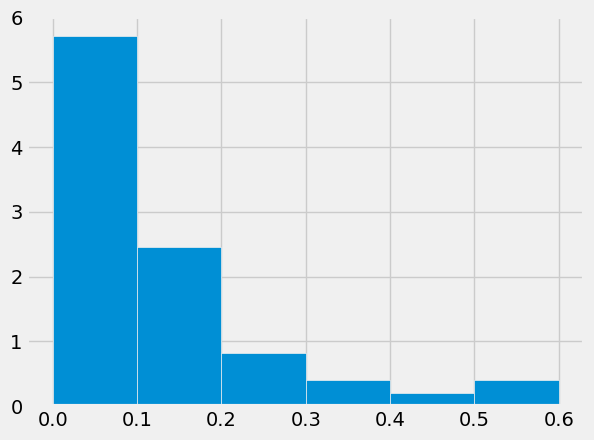

In [194]:
sample_data = player_data.join('Player', sample_salary_data, 'Name')
value = (sample_data.column('PTS') - 2 * sample_data.column('2P')) / (sample_data.column('Salary') / 100000)
sample_data_with_value = sample_data.with_column('Value', value)
plt.hist(sample_data_with_value.column('Value'), bins = bins, density=True)

**Question 4.** For which range of values does the plot in question 3 better depict the distribution of the **population's player values**: 0 to 0.3, or above 0.3? Explain your answer. 

<!--
BEGIN QUESTION
name: q3_5
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

## 4. Assessing Jade's Models
#### Games with Jade

Our friend Jade comes over and asks us to play a game with her. The game works like this: 

> We will draw randomly with replacement from a simplified 13 card deck with 4 face cards (A, J, Q, K), and 9 numbered cards (2, 3, 4, 5, 6, 7, 8, 9, 10). If we draw cards with replacement 13 times, and if the number of face cards is greater than or equal to 4, we lose.
> 
> Otherwise, Jade loses.

We play the game once and we lose, observing 8 total face cards. We are angry and accuse Jade of cheating! Jade is adamant, however, that the deck is fair.

Jade's model claims that there is an equal chance of getting any of the cards (A, 2, 3, 4, 5, 6, 7, 8, 9, 10, J, Q, K), but we do not believe her. We believe that the deck is clearly rigged, with face cards (A, J, Q, K) being more likely than the numbered cards (2, 3, 4, 5, 6, 7, 8, 9, 10).

#### Question 1
Assign `deck_model_probabilities` to a two-item array containing the chance of drawing a face card as the first element, and the chance of drawing a numbered card as the second element under Jade's model. Since we're working with probabilities, make sure your values are between 0 and 1. 

<!--
BEGIN QUESTION
name: q5_1
manual: false
-->

In [195]:
deck_model_probabilities = [4/13, 9/13]
deck_model_probabilities

[0.3076923076923077, 0.6923076923076923]

**Question 2**

We believe Jade's model is incorrect. In particular, we believe there to be a  larger chance of getting a face card. Which of the following statistics can we use during our simulation to test between the model and our alternative? Assign `statistic_choice` to the correct answer. 

1. The distance (absolute value) between the actual number of face cards in 13 draws and the expected number of face cards in 13 draws (4)
2. The expected number of face cards in 13 draws (4)
3. The actual number of face cards we get in 13 draws

<!--
BEGIN QUESTION
name: q5_2
manual: false
-->

In [196]:
statistic_choice = 1
statistic_choice

1

#### Question 3

Define the function `deck_simulation_and_statistic`, which, given a sample size and an array of model proportions (like the one you created in Question 1), returns the number of face cards in one simulation of drawing cards under the model specified in `model_proportions`. 

*Hint:* Think about how you can use the function `sample_proportions`. 

<!--
BEGIN QUESTION
name: q5_3
manual: false
-->

In [204]:
print(np.random.rand())

0.21738888243865484


In [217]:
def deck_simulation_and_statistic(sample_size, model_proportions):
    number_of_face_cards_drawn=0
    for i in np.arange(sample_size):
        if np.random.rand() <= model_proportions[0]:
            number_of_face_cards_drawn += 1
    return number_of_face_cards_drawn


deck_simulation_and_statistic(13, deck_model_probabilities)

5

**Question 4** 

Use your function from above to simulate the drawing of 13 cards 5000 times under the proportions that you specified in Question 1. Keep track of all of your statistics in `deck_statistics`. 

<!--
BEGIN QUESTION
name: q5_4
manual: false
-->

In [227]:
repetitions = 5000 
deck_statistics = make_array()
for i in np.arange(repetitions):
    deck_statistics = np.append(deck_statistics, deck_simulation_and_statistic(13, deck_model_probabilities))

deck_statistics

array([ 2.,  2.,  4., ...,  6.,  4.,  3.])

Let’s take a look at the distribution of simulated statistics.

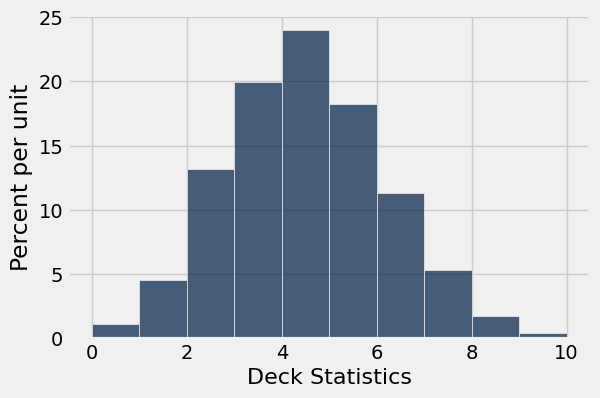

In [228]:
#Draw a distribution of statistics 
Table().with_column('Deck Statistics', deck_statistics).hist()

#### Question 5
Given your observed value, do you believe that Jade's model is reasonable, or is our alternative more likely? Explain your answer using the distribution drawn in the previous problem. 

<!--
BEGIN QUESTION
name: q5_5
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

## 5. Submission


To submit your assignment, please download your notebook as a .ipynb file and submit to Canvas. You can do so by navigating to the toolbar at the top of this page, clicking File > Download as... > Notebook (.ipynb) or HTML (.html). Then, upload your files under "Assignment 3" on Canvas.